**Import Packages and Dataframe**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from data_review import DataTransform as dt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
df = pd.read_csv('C:/Users/alanw/AI_CORE_FOLDER/Finance_project/loan_payments.csv')



**Find shape of Dataframe**

In [2]:
df.shape

(54231, 43)

**The next step is to see what the data structure is**

In [3]:
data_info=df.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           54231 non-null  int64  
 1   member_id                    54231 non-null  int64  
 2   loan_amount                  54231 non-null  int64  
 3   funded_amount                51224 non-null  float64
 4   funded_amount_inv            54231 non-null  float64
 5   term                         49459 non-null  object 
 6   int_rate                     49062 non-null  float64
 7   instalment                   54231 non-null  float64
 8   grade                        54231 non-null  object 
 9   sub_grade                    54231 non-null  object 
 10  employment_length            52113 non-null  object 
 11  home_ownership               54231 non-null  object 
 12  annual_inc                   54231 non-null  float64
 13  verification_sta

**Showing general statistics of data**

In [4]:
data_stats=df.describe()
print(data_stats)

                 id     member_id   loan_amount  funded_amount  \
count  5.423100e+04  5.423100e+04  54231.000000   51224.000000   
mean   7.621797e+06  8.655350e+06  13333.076100   13229.509117   
std    9.571362e+06  1.031281e+07   8082.196709    8019.017599   
min    5.552100e+04  7.069400e+04    500.000000     500.000000   
25%    7.594330e+05  9.587720e+05   7000.000000    7000.000000   
50%    7.084590e+06  8.709873e+06  12000.000000   12000.000000   
75%    8.860616e+06  1.052714e+07  18000.000000   18000.000000   
max    3.867612e+07  4.146185e+07  35000.000000   35000.000000   

       funded_amount_inv      int_rate    instalment    annual_inc  \
count       54231.000000  49062.000000  54231.000000  5.423100e+04   
mean        12952.622979     13.507328    400.013953  7.222085e+04   
std          8099.473527      4.392893    238.920012  5.158934e+04   
min             0.000000      5.420000     15.670000  3.300000e+03   
25%          6700.000000     10.370000    224.205000  4

**After checking the details of Data set, time to view sample of data**

In [5]:
data_sample=df.sample(25)
print(data_sample)

             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
49578    481733     612713         7000         7000.0        7000.000000   
24335   7305676    8947771        19200        19200.0       19200.000000   
33436   1069410    1303652        21000        21000.0       20975.000000   
35759    993621    1217982        20800        20800.0       20800.000000   
51152    438208     527516         1000         1000.0        1000.000000   
27890   6928989    8570895        15000            NaN       15000.000000   
24297   7306583    8948637        14600        14600.0       14600.000000   
6123    9846985   11698903        10000        10000.0       10000.000000   
45180    606121     777536        24250        24250.0       24125.000000   
45779    589730     757549        24000        24000.0       23689.886390   
1119   38504590   41298334         6000         6000.0        6000.000000   
3542   37710846   40483703        35000        35000.0       35000.000000   

**Remove Duplicates, and if null columns are grater then 30% drop from Dataframe**

In [6]:
dup_df=df.duplicated()
print(df[dup_df])
#No duplicates found, therefore no records need to be dropped.

Empty DataFrame
Columns: [id, member_id, loan_amount, funded_amount, funded_amount_inv, term, int_rate, instalment, grade, sub_grade, employment_length, home_ownership, annual_inc, verification_status, issue_date, loan_status, payment_plan, purpose, dti, delinq_2yrs, earliest_credit_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_accounts, total_accounts, out_prncp, out_prncp_inv, total_payment, total_payment_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_payment_date, last_payment_amount, next_payment_date, last_credit_pull_date, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type]
Index: []

[0 rows x 43 columns]


**Check for null columns within the dataset**

In [7]:
percentage_of_null=round(df.isnull().sum()*100/len(df),2)
print(percentage_of_null)

id                              0.00
member_id                       0.00
loan_amount                     0.00
funded_amount                   5.54
funded_amount_inv               0.00
term                            8.80
int_rate                        9.53
instalment                      0.00
grade                           0.00
sub_grade                       0.00
employment_length               3.91
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_date                      0.00
loan_status                     0.00
payment_plan                    0.00
purpose                         0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_credit_line            0.00
inq_last_6mths                  0.00
mths_since_last_delinq         57.17
mths_since_last_record         88.60
open_accounts                   0.00
total_accounts                  0.00
out_prncp                       0.00
o

In [8]:
tranform=dt
df=dt.modeval(df,'int_rate')
df=dt.convert_to_integer(df,'term')

From the percentage summary we have found the following colums (mths_since_last_delinq,mths_since_last_record,next_payment_date,mths_since_last_major_derog)
All have high percentage of missing data, (over 30%). Therefore these columns will be required to be droppped from the dataframe.

In [9]:
df=df.drop(columns=['mths_since_last_delinq','mths_since_last_record','mths_since_last_major_derog'],axis=1)
df['employment_length']=df['employment_length'].fillna('tbc')
df['funded_amount']=df['funded_amount'].fillna('loan_amount')


<Axes: >

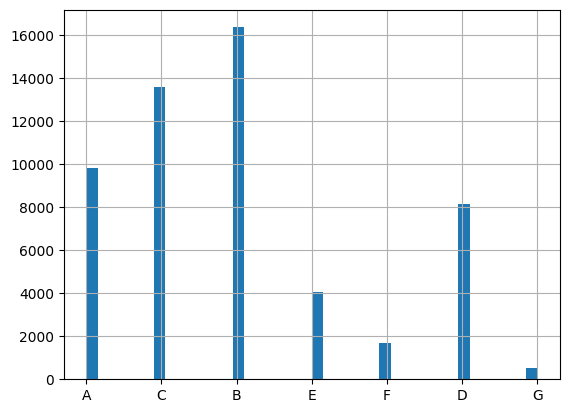

In [10]:
df['grade'].hist(bins=40)
# Having reviewed by grade even though it looks skew it really isn'test.py


['id', 'member_id', 'funded_amount', 'term', 'grade', 'sub_grade', 'employment_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'policy_code', 'application_type']
Skew of loan amount column is 0.81
Skew of funded amount inv column is 0.81
Skew of interest rate column is 0.46
Skew of installments column is 1.0
Skew of last payment amount column is 2.5


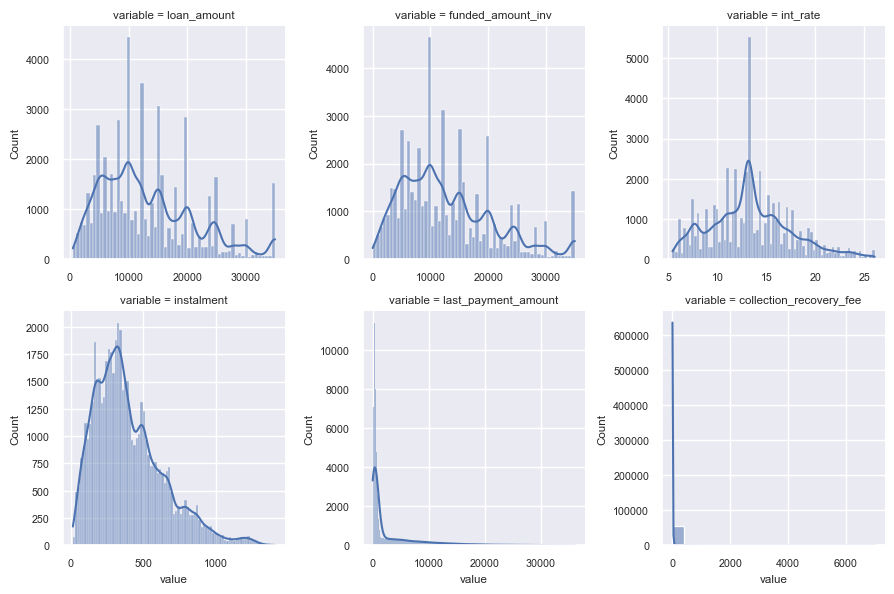

In [11]:
numeric_features = ['loan_amount',
                    'funded_amount_inv',
                    'int_rate',
                    'instalment',
                    'last_payment_amount',
                    'collection_recovery_fee'
                    ]

categorical_features = [col for col in df.columns if col not in numeric_features]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)
print(categorical_features)
print(f"Skew of loan amount column is {df['loan_amount'].skew().round(2)}")
print(f"Skew of funded amount inv column is {df['funded_amount_inv'].skew().round(2)}")
print(f"Skew of interest rate column is {df['int_rate'].skew().round(2)}")
print(f"Skew of installments column is {df['instalment'].skew().round(2)}")
print(f"Skew of last payment amount column is {df['last_payment_amount'].skew().round(2)}")

From the graphs above it has been noticed that all of the numerical data has a positive skew. 
With further investigation the collection recovery data is relativey low and therefore will be ignored but
the 2 with the biggest is installments which has a skew of 1 and last payment having a skew of 2.5. 
These 2 columns require further analysis to even out the ditribution. The remaining the skew are all below 1 therefore 
there is no real benefit of modifying the data to address this.

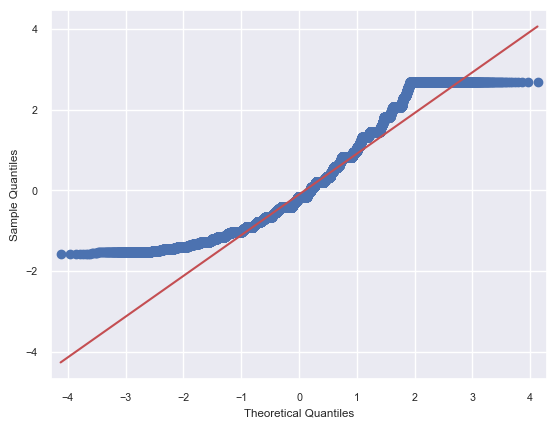

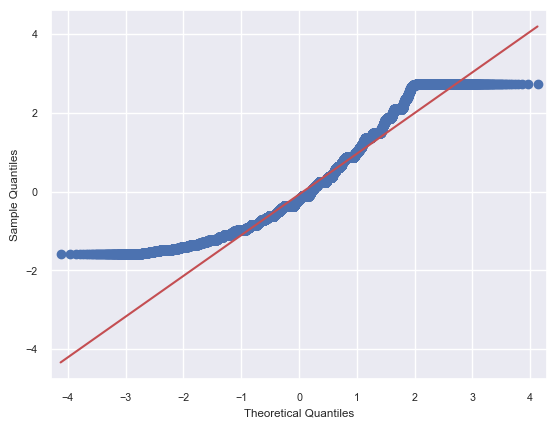

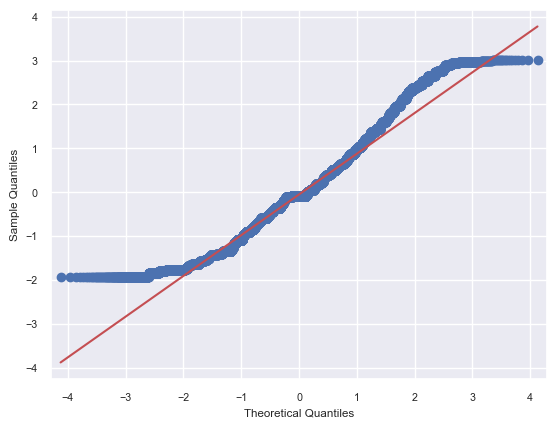

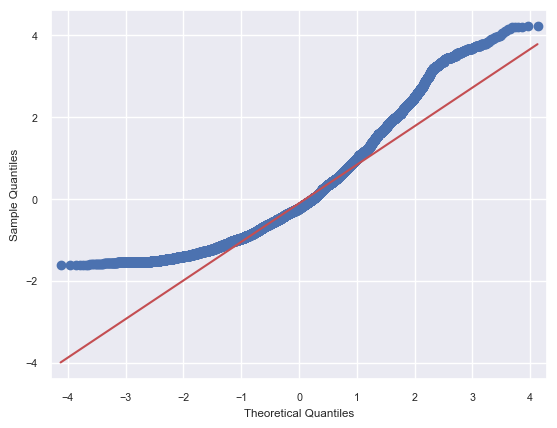

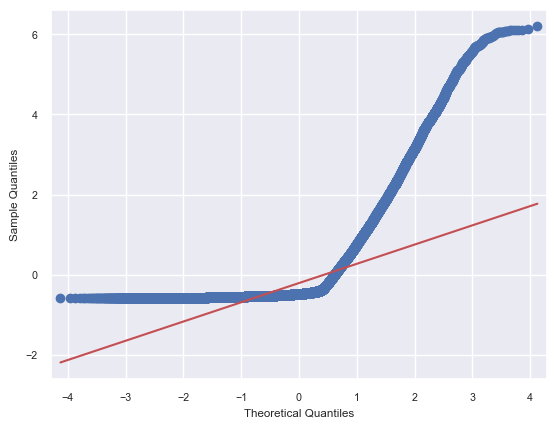

,loan_amount,funded_amount_inv,int_rate,instalment,last_payment_amount
count,54231.00,54231.00,54231.00,54231.00,54231.00
mean,13333.08,12952.62,13.47,400.01,3130.71
std,8082.20,8099.47,4.18,238.92,5323.80
min,500.00,0.00,5.42,15.67,0.00
25%,7000.00,6700.00,10.65,224.20,289.79
50%,12000.00,11300.00,13.16,347.15,562.67
75%,18000.00,18000.00,15.88,527.55,3738.12
max,35000.00,35000.00,26.06,1407.01,36115.20


In [12]:
qq_plot1 = qqplot(df['loan_amount'] , scale=1 ,line='q', fit=True)
plt.show()
qq_plot2 = qqplot(df['funded_amount_inv'] , scale=1 ,line='q', fit=True)
plt.show()
qq_plot3 = qqplot(df['int_rate'] , scale=1 ,line='q', fit=True)
plt.show()
qq_plot4 = qqplot(df['instalment'] , scale=1 ,line='q', fit=True)
plt.show()
qq_plot5 = qqplot(df['last_payment_amount'] , scale=1 ,line='q', fit=True)
plt.show()
df[['loan_amount','funded_amount_inv','int_rate','instalment','last_payment_amount']].describe().round(2)

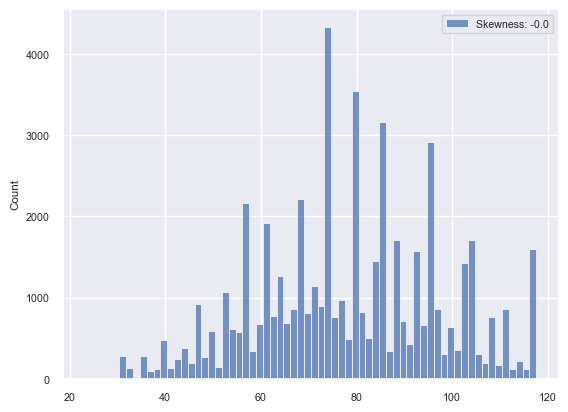

In [13]:

boxcox_loan = df["loan_amount"]
boxcox_loan= stats.boxcox(boxcox_loan)
boxcox_loan= pd.Series(boxcox_loan[0])
t=sns.histplot(boxcox_loan,label="Skewness: %.1f"%(boxcox_loan.skew()) )
t.legend()

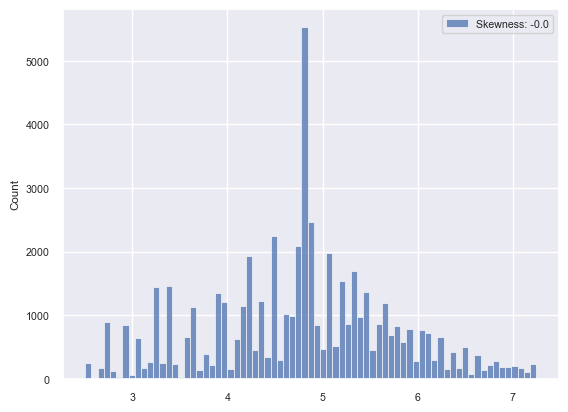

In [14]:
boxcox_int_rate = df["int_rate"]
boxcox_int_rate= stats.boxcox(boxcox_int_rate)
boxcox_int_rate= pd.Series(boxcox_int_rate[0])
t=sns.histplot(boxcox_int_rate,label="Skewness: %.1f"%(boxcox_int_rate.skew()) )
t.legend()

,loan_amount,total_payment
loan_status,,
Charged Off,76359400,3.740059e+07
Current,287810475,2.124591e+08
Default,756350,4.973905e+05
Does not meet the credit policy. Status:Charged Off,3624275,1.846539e+06
Does not meet the credit policy. Status:Fully Paid,8969025,1.066322e+07
Fully Paid,331172150,3.820596e+08
In Grace Period,4071575,3.247087e+06
Late (16-30 days),1561025,1.068044e+06
Late (31-120 days),8741775,5.825981e+06
